# Clusters para Milpa Alta

In [1]:
import pandas as pd
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

df = pd.read_csv("data/data_preparation_milpa_alta.csv")
columnas_interes = ['riesgo_delito', 'Sexo_num', 'Edad', 'TipoPersona_num']

selected_data = df[columnas_interes]
selected_data['Edad_norm'] = (selected_data['Edad'] - selected_data['Edad'].min()) / (selected_data['Edad'].max() - selected_data['Edad'].min()) * 10
selected_data.drop('Edad', axis=1, inplace=True)
selected_data.head()

/var/folders/w7/2qfkwrqj78s87nng1w7_tnx80000gn/T/ipykernel_15296/2294904399.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['Edad_norm'] = (selected_data['Edad'] - selected_data['Edad'].min()) / (selected_data['Edad'].max() - selected_data['Edad'].min()) * 10
/var/folders/w7/2qfkwrqj78s87nng1w7_tnx80000gn/T/ipykernel_15296/2294904399.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data.drop('Edad', axis=1, inplace=True)


,riesgo_delito,Sexo_num,TipoPersona_num,Edad_norm
0,1,5,5,5.000000
1,1,5,5,6.956522
2,6,10,5,4.456522
3,6,10,5,3.586957
4,10,5,5,3.043478


In [2]:
selected_data.head()

,riesgo_delito,Sexo_num,TipoPersona_num,Edad_norm
0,1,5,5,5.000000
1,1,5,5,6.956522
2,6,10,5,4.456522
3,6,10,5,3.586957
4,10,5,5,3.043478


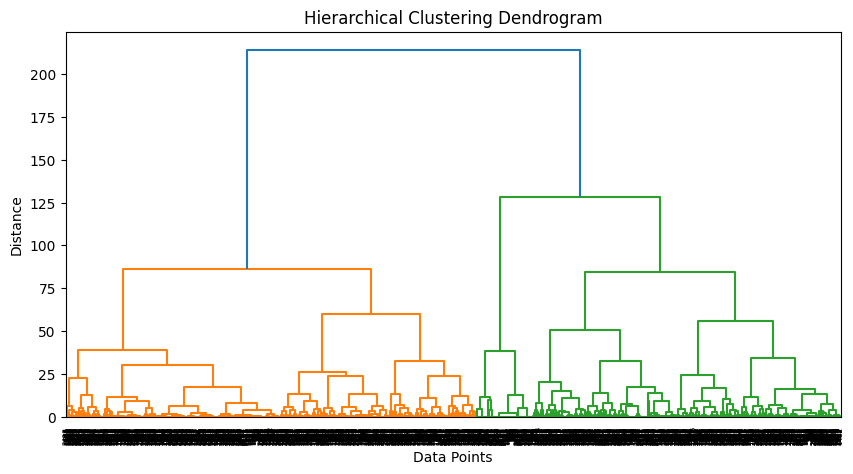

In [3]:
Z = linkage(selected_data, method='ward')

plt.figure(figsize=(10, 5))
dendrogram(Z, labels=df.index)
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

### Riesgo y Edad

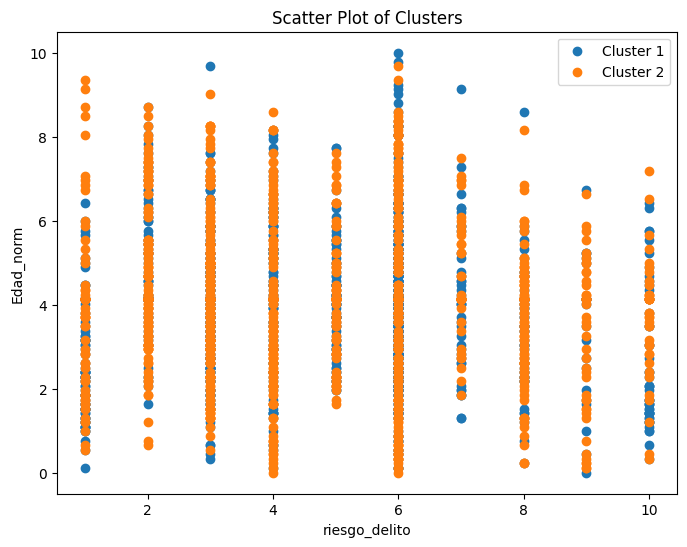

In [8]:
from scipy.cluster.hierarchy import fcluster

k = 2  # Number of clusters
clusters = fcluster(Z, k, criterion='maxclust')

# Add cluster labels to the DataFrame
selected_data['H-Cluster'] = clusters

# Create a scatter plot for each cluster
plt.figure(figsize=(8, 6))
for cluster_label, cluster_data in selected_data.groupby('H-Cluster'):
    plt.scatter(cluster_data['riesgo_delito'], cluster_data['Edad_norm'], label=f'Cluster {cluster_label}')

plt.xlabel('riesgo_delito')
plt.ylabel('Edad_norm')
plt.title('Scatter Plot of Clusters')
plt.legend()
plt.show()

### Riesgo y Sexo

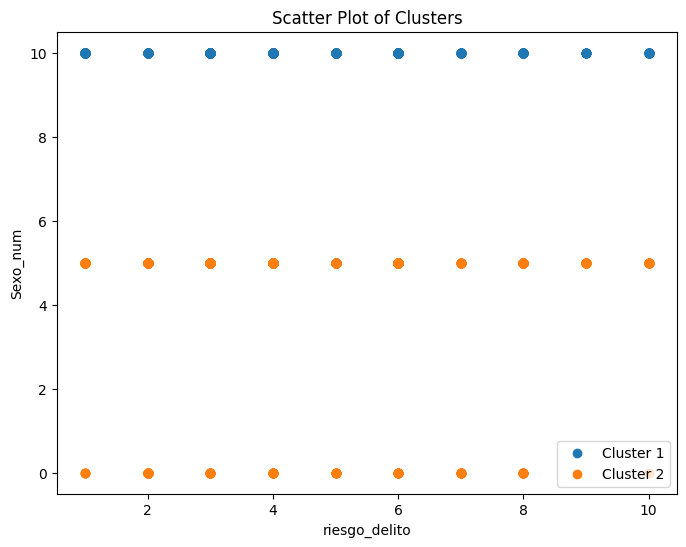

In [9]:
plt.figure(figsize=(8, 6))
for cluster_label, cluster_data in selected_data.groupby('H-Cluster'):
    plt.scatter(cluster_data['riesgo_delito'], cluster_data['Sexo_num'], label=f'Cluster {cluster_label}')

plt.xlabel('riesgo_delito')
plt.ylabel('Sexo_num')
plt.title('Scatter Plot of Clusters')
plt.legend()
plt.show()

### Riesgo y Tipo de Persona

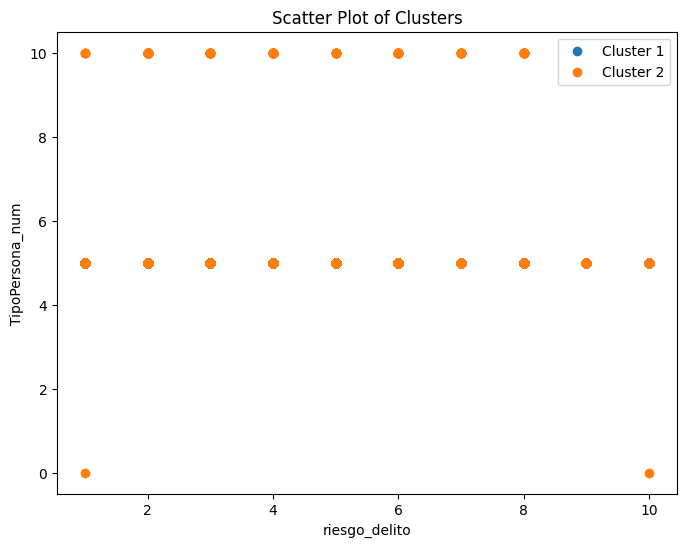

In [10]:
plt.figure(figsize=(8, 6))
for cluster_label, cluster_data in selected_data.groupby('H-Cluster'):
    plt.scatter(cluster_data['riesgo_delito'], cluster_data['TipoPersona_num'], label=f'Cluster {cluster_label}')

plt.xlabel('riesgo_delito')
plt.ylabel('TipoPersona_num')
plt.title('Scatter Plot of Clusters')
plt.legend()
plt.show()

## K Means Clusters

/Users/gusvasquez/Library/Application Support/JetBrains/DataSpell2022.3/projects/workspace/venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/gusvasquez/Library/Application Support/JetBrains/DataSpell2022.3/projects/workspace/venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/gusvasquez/Library/Application Support/JetBrains/DataSpell2022.3/projects/workspace/venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/gusvasquez/Library/Application Support/Jet

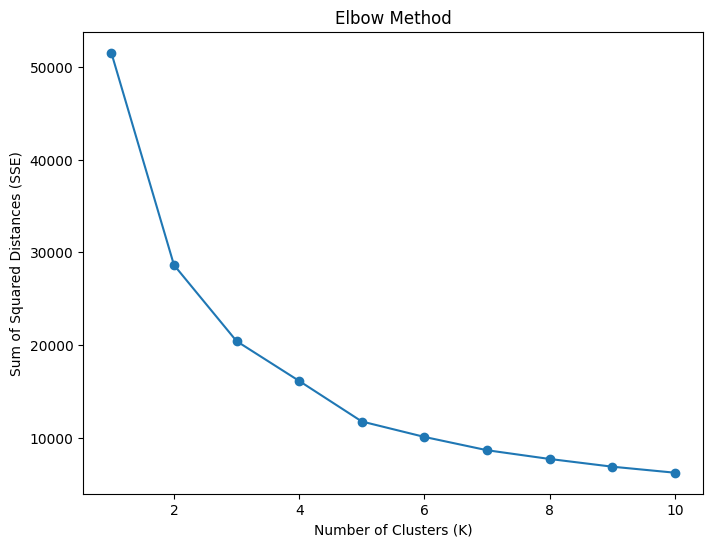

In [11]:
from sklearn.cluster import KMeans

selected_data = selected_data[['riesgo_delito', 'Sexo_num', 'TipoPersona_num', 'Edad_norm']]
k_values = range(1, 11)

# Initialize an empty list to store the SSE values
sse = []

# Calculate SSE for different values of K
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(selected_data)
    sse.append(kmeans.inertia_)

# Plot the SSE values against number of clusters (K)
plt.figure(figsize=(8, 6))
plt.plot(k_values, sse, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Distances (SSE)')
plt.title('Elbow Method')
plt.show()

/Users/gusvasquez/Library/Application Support/JetBrains/DataSpell2022.3/projects/workspace/venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


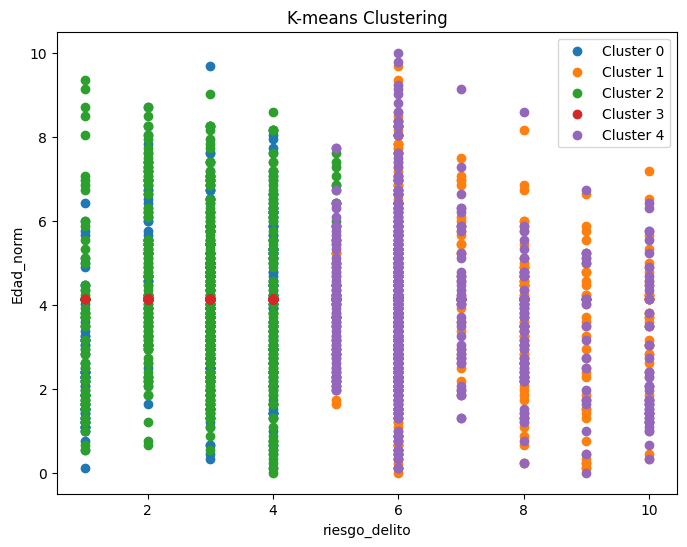

In [12]:
k = 5

# Perform K-means clustering on the scaled data
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(selected_data)

selected_data['K-Cluster'] = clusters

plt.figure(figsize=(8, 6))
for cluster_label, cluster_data in selected_data.groupby('K-Cluster'):
    plt.scatter(cluster_data['riesgo_delito'], cluster_data['Edad_norm'], label=f'Cluster {cluster_label}')

plt.xlabel('riesgo_delito')
plt.ylabel('Edad_norm')
plt.title('K-means Clustering')
plt.legend()
plt.show()

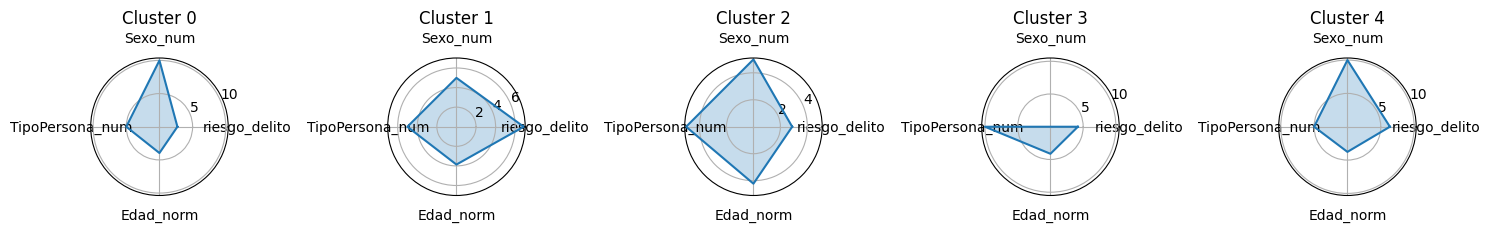

In [13]:
from math import pi
import numpy as np

radar_data = selected_data
cluster_means = radar_data.groupby('K-Cluster').mean().reset_index()
num_clusters = len(cluster_means)
variable_names = ['riesgo_delito', 'Sexo_num', 'TipoPersona_num', 'Edad_norm']

angles = np.linspace(0, 2 * pi, len(variable_names), endpoint=False).tolist()
angles += angles[:1]

fig, axs = plt.subplots(1, num_clusters, figsize=(15, 5), subplot_kw={'projection': 'polar'})

for cluster_idx, ax in enumerate(axs):
    # Get the cluster mean values
    cluster_values = cluster_means.loc[cluster_idx, variable_names].values.tolist()
    cluster_values += cluster_values[:1]

    # Create a radar plot for the cluster
    ax.plot(angles, cluster_values)
    ax.fill(angles, cluster_values, alpha=0.25)

    # Set the title for the cluster
    ax.set_title(f'Cluster {cluster_idx}')

    # Set the labels for the radar plot
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(variable_names)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the radar plot
plt.show()